# Data Cleaning Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.display.max_rows = 4000

In [2]:
ames_train = '../datasets/train.csv'
ames_test = '../datasets/test.csv'

df = pd.read_csv(ames_train)

In [3]:
df.shape

(2051, 81)

In [4]:
#  rename the columns names continuous with an underscore
temp = []
for col_name in df.columns:
    temp.append(col_name.replace(' ', '_'))
df.columns = temp

In [5]:
df.describe()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


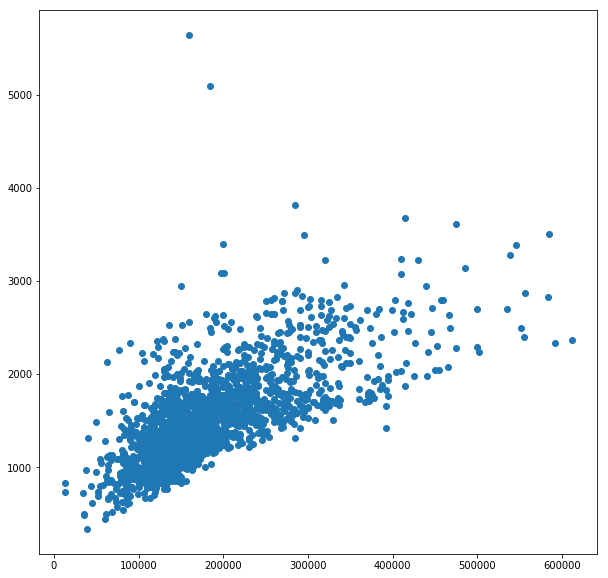

In [6]:
plt.figure(figsize= (10,10))
plt.scatter(df['SalePrice'], df['Gr_Liv_Area'])

### Data description suggests to instructors to drop houses over 4000 sq. ft. because of partial sales (huge houses sold with relatively very low prices (example is a approx 5000 sq ft house selling near 200,000 dollars)

In [7]:
df = df[df['Gr_Liv_Area'] < 4000]

In [8]:
df.shape

(2049, 81)

In [9]:
# drop anyting below sale price of 20,000 dollars
df = df[df['SalePrice'] > 20000]

In [10]:
df.shape

(2047, 81)

In [11]:
# drop anything with more than 1000 nulls
df = df.drop(['Alley', 'Fireplace_Qu','Pool_QC', 'Fence', 'Misc_Feature'], axis= 1)

In [12]:
print(df.isnull().sum())

Id                   0
PID                  0
MS_SubClass          0
MS_Zoning            0
Lot_Frontage       330
Lot_Area             0
Street               0
Lot_Shape            0
Land_Contour         0
Utilities            0
Lot_Config           0
Land_Slope           0
Neighborhood         0
Condition_1          0
Condition_2          0
Bldg_Type            0
House_Style          0
Overall_Qual         0
Overall_Cond         0
Year_Built           0
Year_Remod/Add       0
Roof_Style           0
Roof_Matl            0
Exterior_1st         0
Exterior_2nd         0
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Exter_Qual           0
Exter_Cond           0
Foundation           0
Bsmt_Qual           54
Bsmt_Cond           54
Bsmt_Exposure       57
BsmtFin_Type_1      54
BsmtFin_SF_1         1
BsmtFin_Type_2      55
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Heating              0
Heating_QC           0
Central_Air          0
Electrical           0
1st_Flr_SF 

In [13]:
# replace any columns with NaN with 0  
#     and make a binary column note of the replacement

In [14]:
df['Lot_Frontage_missing'] = df['Lot_Frontage'].isnull().apply(lambda x: 1 if x == True else 0)
df['Lot_Frontage'].fillna(0, inplace= True)

In [15]:
df['Mas_Vnr_Type_missing'] = df['Mas_Vnr_Type'].isnull().apply(lambda x: 1 if x == True else 0)
df['Mas_Vnr_Type'].fillna('None', inplace= True)

In [16]:
df['Mas_Vnr_Area_missing'] = df['Mas_Vnr_Area'].isnull().apply(lambda x: 1 if x == True else 0)
df['Mas_Vnr_Area'].fillna(0, inplace= True)

In [17]:
df['Bsmt_Qual_missing'] = df['Bsmt_Qual'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Qual'].fillna('NA', inplace= True)

In [18]:
df['Bsmt_Cond_missing'] = df['Bsmt_Cond'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Cond'].fillna('NA', inplace= True)

In [19]:
df['Bsmt_Exposure_missing'] = df['Bsmt_Exposure'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Exposure'].fillna('NA', inplace= True)

In [20]:
df['BsmtFin_Type_1_missing'] = df['BsmtFin_Type_1'].isnull().apply(lambda x: 1 if x == True else 0)
df['BsmtFin_Type_1'].fillna('NA', inplace= True) 

In [21]:
df['BsmtFin_SF_1_missing'] = df['BsmtFin_SF_1'].isnull().apply(lambda x: 1 if x == True else 0)
df['BsmtFin_SF_1'].fillna(0, inplace= True) 

In [22]:
df['BsmtFin_Type_2_missing'] = df['BsmtFin_Type_2'].isnull().apply(lambda x: 1 if x == True else 0)
df['BsmtFin_Type_2'].fillna('NA', inplace= True) 

In [23]:
df['BsmtFin_SF_2_missing'] = df['BsmtFin_SF_2'].isnull().apply(lambda x: 1 if x == True else 0)
df['BsmtFin_SF_2'].fillna(0, inplace= True) 

In [24]:
df['Bsmt_Unf_SF_missing'] = df['Bsmt_Unf_SF'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Unf_SF'].fillna(0, inplace= True) 

In [25]:
df['Total_Bsmt_SF_missing'] = df['Total_Bsmt_SF'].isnull().apply(lambda x: 1 if x == True else 0)
df['Total_Bsmt_SF'].fillna(0, inplace= True) 

In [26]:
df['Bsmt_Full_Bath_missing'] = df['Bsmt_Full_Bath'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Full_Bath'].fillna(0, inplace= True) 

In [27]:
df['Bsmt_Half_Bath_missing'] = df['Bsmt_Half_Bath'].isnull().apply(lambda x: 1 if x == True else 0)
df['Bsmt_Half_Bath'].fillna(0, inplace= True) 

In [28]:
df['Garage_Type_missing'] = df['Garage_Type'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Type'].fillna('NA', inplace= True) 

In [29]:
df['Garage_Yr_Blt_missing'] = df['Garage_Yr_Blt'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Yr_Blt'].fillna(0, inplace= True) 

In [30]:
df['Garage_Finish_missing'] = df['Garage_Finish'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Finish'].fillna('NA', inplace= True) 

In [31]:
df['Garage_Cars_missing'] = df['Garage_Cars'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Cars'].fillna(0, inplace= True) 

In [32]:
df['Garage_Area_missing'] = df['Garage_Area'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Area'].fillna(0, inplace= True) 

In [33]:
df['Garage_Qual_missing'] = df['Garage_Qual'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Qual'].fillna('NA', inplace= True) 

In [34]:
df['Garage_Cond_missing'] = df['Garage_Cond'].isnull().apply(lambda x: 1 if x == True else 0)
df['Garage_Cond'].fillna('NA', inplace= True) 

In [35]:
df.describe()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Total_Bsmt_SF_missing,Bsmt_Full_Bath_missing,Bsmt_Half_Bath_missing,Garage_Type_missing,Garage_Yr_Blt_missing,Garage_Finish_missing,Garage_Cars_missing,Garage_Area_missing,Garage_Qual_missing,Garage_Cond_missing
count,2047.000000,2.047000e+03,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1474.268197,7.132117e+08,57.056668,57.769907,10022.630679,6.112848,5.564729,1971.706888,1984.189057,97.832438,...,0.000489,0.000977,0.000977,0.055203,0.055691,0.055691,0.000489,0.000489,0.055691,0.055691
std,844.175670,1.886817e+08,42.846206,32.645334,6610.967208,1.415066,1.102555,30.163696,21.028699,171.993245,...,0.022102,0.031250,0.031250,0.228431,0.229381,0.229381,0.022102,0.022102,0.229381,0.229381
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.500000,5.284581e+08,20.000000,43.000000,7500.000000,5.000000,5.000000,1954.000000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1481.000000,5.354532e+08,50.000000,63.000000,9400.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2199.500000,9.071756e+08,70.000000,78.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


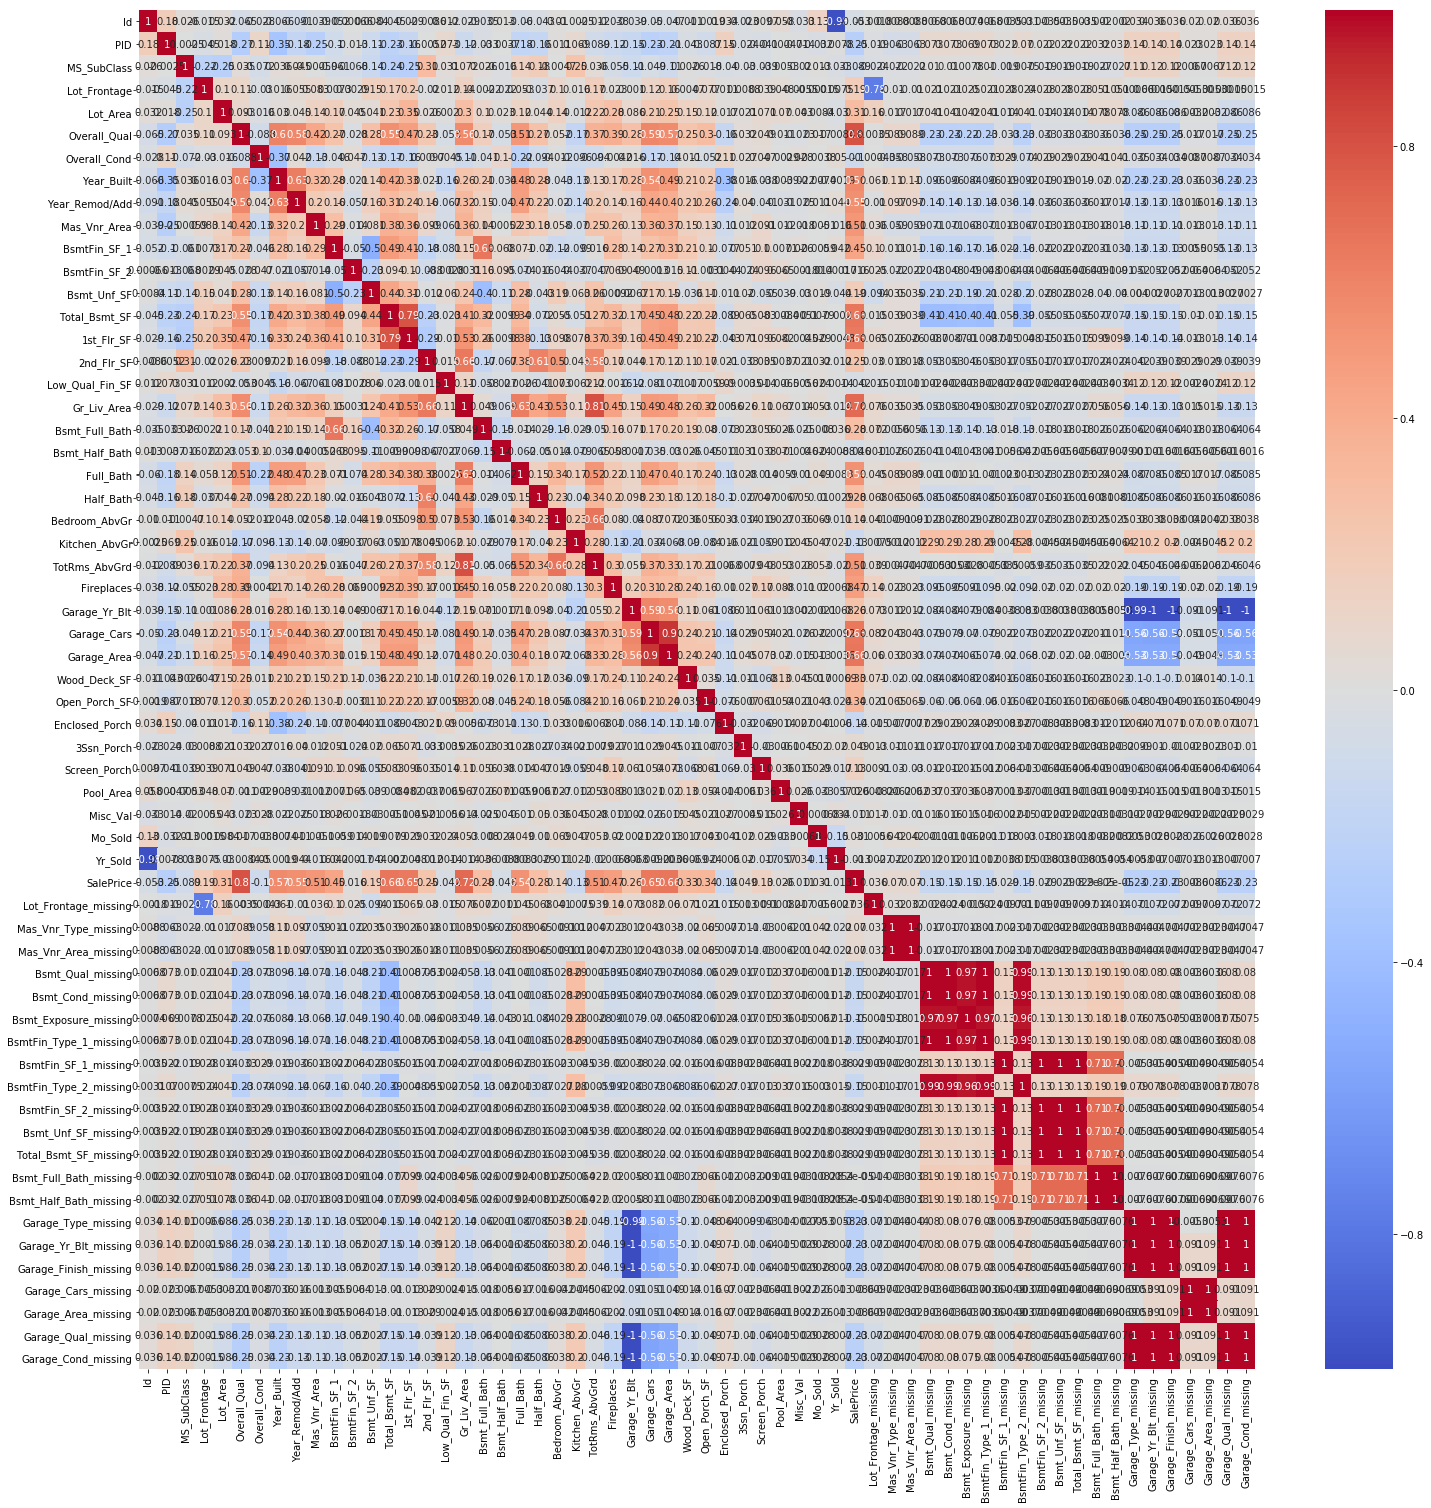

In [36]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.savefig('../datasets/heatmap.png')

In [37]:
df.to_csv('../datasets/cleaned_up_data.csv')